# Credit Risk 
## Abstract
Summary tbd
## Problem
This project will be a dataset exploration of the Credit Risk dataset from the Give Me Some Credit Feature Prediction Competition hosted on Kaggle.com. Some features included in this dataset include monthly income, number of dependents, and age. Using such features, I plan on exploring the question of whether or not an individual is at “Credit Risk”. Credit risk is a measure of the probability that an individual will not be able to pay back a debt such as those gained from a credit card or a loan. This measure will help financial institutions determine whether to allow an individual to take out a loan in good faith. Currently, banks and other related financial institutions have measured this through FICO Credit Score and other such means. The measures for what exactly make a candidate at risk is a black box. Often, the only piece of information given back to the consumer is their credit score, but where this result comes from is unclear. For this project, I will be looking at the impact certain features have on whether or not an individual is at credit risk. In doing so, I can shed some light on which features are the most important in considering whether an individual's probability of credit risk is high.
## Data Cleaning
In this section, I will be cleaning the data (removing Nan values) in preparation for analysis.

In [121]:
import pandas as pd

training_data = pd.read_csv("./Raw Data/cs-training.csv", index_col=0)

print("Total Samples:", len(training_data))
print(training_data.isna().sum())

Total Samples: 150000
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64


We can see there are some rows that have Nan values for MonthlyIncome and/or NumberOfDependents. While it may be easy and reasonable to substitute 0 for NumberOfDependents, it would not be reasonable to do the same. I suspect thaht these Nan values are those that chose to not disclose such information. For this reason, and because our sample size is large enough, I chose to drop all of the rows with Nan values.

In [122]:
# Dropping Nan since Nan seems to mean that no entry submitted for Monthly Income or Number of Dependents
training_data.dropna(inplace = True)
# Monthly income and Dependents are given as Integers
training_data = training_data.astype({"NumberOfDependents":'int', "MonthlyIncome":'int'}) 
print("Remaining Samples:", len(training_data))
training_data.to_csv("./Cleaned Data/Analysis/data.csv", index=False)

Remaining Samples: 120269


## Data Analysis
In this section, I will be analyzing the different features of the dataset. The following gives the descriptions of each feature as well as the format they are entered as.

![Data Descriptions](./Images/data_descriptions.png)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

training_data = pd.read_csv("./Cleaned Data/Analysis/data.csv", index_col=False)

print(training_data.shape)
training_data.head()

(120269, 11)


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120,13,0,6,0,2
1,0,0.957151,40,0,0.121876,2600,4,0,0,0,1
2,0,0.658180,38,1,0.085113,3042,2,1,0,0,0
3,0,0.233810,30,0,0.036050,3300,5,0,0,0,0
4,0,0.907239,49,1,0.024926,63588,7,0,1,0,0


### RevolvingUtilizationOfUnsecuredLines
In this section, I will be analyzing the RevolvingUtilizationOfUnsecuredLines feature. First, I look at the distribution of the values for this feature.

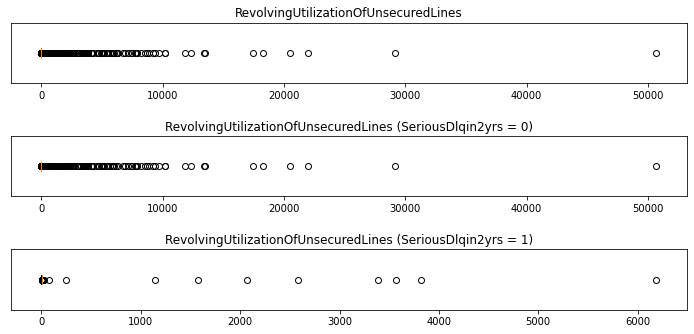

In [118]:
fig = plt.figure(figsize=(10, 5))

plt.subplot(3, 1, 1)
plt.boxplot(training_data["RevolvingUtilizationOfUnsecuredLines"], vert=False)
ax = plt.gca()
ax.set_title("RevolvingUtilizationOfUnsecuredLines")
ax.get_yaxis().set_visible(False)

plt.subplot(3, 1, 2)
plt.boxplot(training_data[training_data["SeriousDlqin2yrs"] == 0]["RevolvingUtilizationOfUnsecuredLines"], vert=False)
ax = plt.gca()
ax.set_title("RevolvingUtilizationOfUnsecuredLines (SeriousDlqin2yrs = 0)")
ax.get_yaxis().set_visible(False)

plt.subplot(3, 1, 3)
plt.boxplot(training_data[training_data["SeriousDlqin2yrs"] == 1]["RevolvingUtilizationOfUnsecuredLines"], vert=False)
ax = plt.gca()
ax.set_title("RevolvingUtilizationOfUnsecuredLines (SeriousDlqin2yrs = 1)")
ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=2.0)
plt.show()

In [135]:
training_data["RevolvingUtilizationOfUnsecuredLines"].describe()

count    120269.000000
mean          5.899873
std         257.040685
min           0.000000
25%           0.035084
50%           0.177282
75%           0.579428
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

Immediately, I can see that there are some quite significant outliers. To get a better result, I will be removing significant outliers, namely those farther than (std / mean) + mean since our std is extremely high compared to our mean.

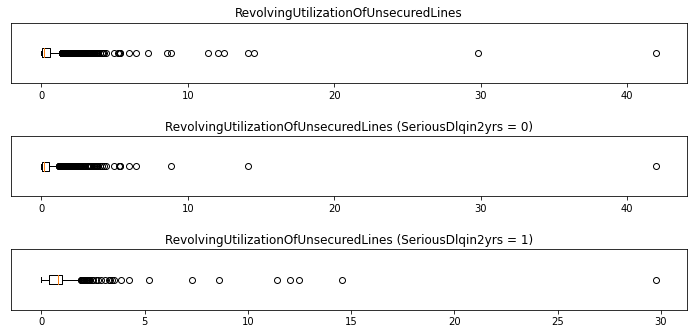

count    120103.000000
mean          0.334732
std           0.400968
min           0.000000
25%           0.034962
50%           0.176658
75%           0.576889
max          42.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64


In [158]:
mean = training_data["RevolvingUtilizationOfUnsecuredLines"].mean()
std = training_data["RevolvingUtilizationOfUnsecuredLines"].std()

processed_data = training_data[training_data["RevolvingUtilizationOfUnsecuredLines"] <= std / mean + mean]

fig = plt.figure(figsize=(10, 5))

plt.subplot(3, 1, 1)
plt.boxplot(processed_data["RevolvingUtilizationOfUnsecuredLines"], vert=False)
ax = plt.gca()
ax.set_title("RevolvingUtilizationOfUnsecuredLines")
ax.get_yaxis().set_visible(False)

plt.subplot(3, 1, 2)
plt.boxplot(processed_data[processed_data["SeriousDlqin2yrs"] == 0]["RevolvingUtilizationOfUnsecuredLines"], vert=False)
ax = plt.gca()
ax.set_title("RevolvingUtilizationOfUnsecuredLines (SeriousDlqin2yrs = 0)")
ax.get_yaxis().set_visible(False)

plt.subplot(3, 1, 3)
plt.boxplot(processed_data[processed_data["SeriousDlqin2yrs"] == 1]["RevolvingUtilizationOfUnsecuredLines"], vert=False)
ax = plt.gca()
ax.set_title("RevolvingUtilizationOfUnsecuredLines (SeriousDlqin2yrs = 1)")
ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=2.0)
plt.show()
print(processed_data["RevolvingUtilizationOfUnsecuredLines"].describe())

### Age
In this section, I will be analyzing the age feature.

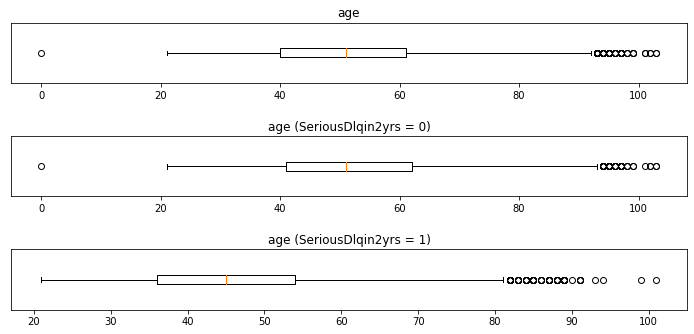

count    120269.000000
mean         51.289792
std          14.426684
min           0.000000
25%          40.000000
50%          51.000000
75%          61.000000
max         103.000000
Name: age, dtype: float64


In [3]:
fig = plt.figure(figsize=(10, 5))

plt.subplot(3, 1, 1)
plt.boxplot(training_data["age"], vert=False)
ax = plt.gca()
ax.set_title("age")
ax.get_yaxis().set_visible(False)

plt.subplot(3, 1, 2)
plt.boxplot(training_data[training_data["SeriousDlqin2yrs"] == 0]["age"], vert=False)
ax = plt.gca()
ax.set_title("age (SeriousDlqin2yrs = 0)")
ax.get_yaxis().set_visible(False)

plt.subplot(3, 1, 3)
plt.boxplot(training_data[training_data["SeriousDlqin2yrs"] == 1]["age"], vert=False)
ax = plt.gca()
ax.set_title("age (SeriousDlqin2yrs = 1)")
ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=2.0)
plt.show()

print(training_data["age"].describe())

The data looks somewhat clean. I do see that there are some cases where the age is 0, which should not be considered and will be removed.

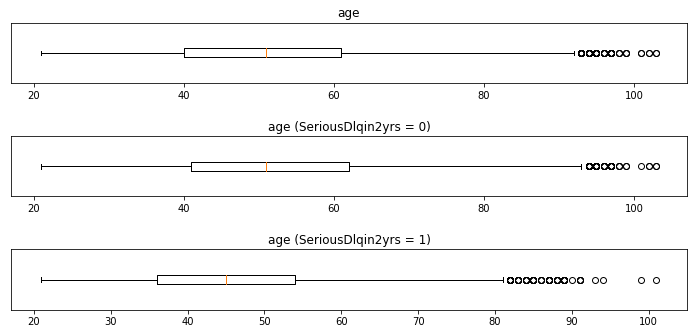

count    120268.000000
mean         51.290219
std          14.425986
min          21.000000
25%          40.000000
50%          51.000000
75%          61.000000
max         103.000000
Name: age, dtype: float64


In [5]:
processed_data = training_data[training_data["age"] > 0]

fig = plt.figure(figsize=(10, 5))

plt.subplot(3, 1, 1)
plt.boxplot(processed_data["age"], vert=False)
ax = plt.gca()
ax.set_title("age")
ax.get_yaxis().set_visible(False)

plt.subplot(3, 1, 2)
plt.boxplot(processed_data[processed_data["SeriousDlqin2yrs"] == 0]["age"], vert=False)
ax = plt.gca()
ax.set_title("age (SeriousDlqin2yrs = 0)")
ax.get_yaxis().set_visible(False)

plt.subplot(3, 1, 3)
plt.boxplot(processed_data[processed_data["SeriousDlqin2yrs"] == 1]["age"], vert=False)
ax = plt.gca()
ax.set_title("age (SeriousDlqin2yrs = 1)")
ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=2.0)
plt.show()
print(processed_data["age"].describe())

In [80]:
training_data[training_data["RevolvingUtilizationOfUnsecuredLines"] > 100]

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
SeriousDlqin2yrs,,,,,,,,,,
0,2340.0,45,0,0.339333,8333,7,0,2,0,2
1,2066.0,58,0,0.271121,6000,8,1,1,0,1
1,1143.0,44,2,0.547762,6500,13,0,4,0,2
0,6324.0,59,0,0.136673,11318,4,0,1,0,1
0,1982.0,33,0,0.144982,8000,4,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
0,7452.0,52,0,0.351365,10000,5,0,2,0,3
0,6109.0,43,0,0.229902,12500,9,0,2,0,0
0,22000.0,38,0,1.080020,3973,7,0,2,0,3


## Data Procesesing

## Data Preparation

In [ ]:
import pandas as pd

training_data = pd.read_csv("./Raw Data/cs-training.csv", index_col=0)
test_data = pd.read_csv("./Raw Data/cs-test.csv", index_col=0)

# Dropping Nan since Nan seems to mean that no entry submitted for Monthly Income or Number of Dependents
training_data.dropna(inplace = True)
# Monthly income and Dependents are given as Integers
training_data = training_data.astype({"NumberOfDependents":'int', "MonthlyIncome":'int'}) 
# Splitting Training Data into Training and Validation
training_data_X = training_data[training_data.columns.drop('SeriousDlqin2yrs')]
training_data_Y = training_data[["SeriousDlqin2yrs"]]

split_index = int(len(training_data_X) * 0.2)

validation_data_X = training_data_X.iloc[:split_index, :]
validation_data_Y = training_data_Y.iloc[:split_index, :]

training_data_X = training_data_X.iloc[split_index:, :]
training_data_Y = training_data_Y.iloc[split_index:, :]

test_data_X = test_data[test_data.columns.drop('SeriousDlqin2yrs')]

training_data_X.to_csv("./Cleaned Data/Train/train_X.csv", index=False)
training_data_Y.to_csv("./Cleaned Data/Train/train_Y.csv", index=False)

validation_data_X.to_csv("./Cleaned Data/Validation/valid_X.csv", index=False)
validation_data_Y.to_csv("./Cleaned Data/Validation/valid_Y.csv", index=False)

test_data_X.to_csv("./Cleaned Data/Test/test_X.csv", index=False)

training_data.to_csv("./Cleaned Data/Analysis/data.csv", index=False)